<a href="https://colab.research.google.com/github/Debanjana939/cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variables
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.

**Data Description**

Demographic:

1 Sex: male or female("M" or "F")

2 Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

3 Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

4 Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

5 BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

6 Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

7 Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

8 Tot Chol: total cholesterol level (Continuous)

9 Sys BP: systolic blood pressure (Continuous)

10 Dia BP: diastolic blood pressure (Continuous)

11 BMI: Body Mass Index (Continuous)

12Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

13Glucose: glucose level (Continuous)

14 Predict variable (desired target)

15 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV





importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading dataset
import pandas as pd
path ="/content/drive/MyDrive/data/train.csv"
df = pd.read_csv(path)

#datase is now stored in a pandas dataframe
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [ ]:
path ="/content/drive/MyDrive/data/train.csv"
type(df)

pandas.core.frame.DataFrame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exploratory data analysis

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

# Display the first few rows of the dataframe to inspect the data
print(df.head())

   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0 

In [ ]:
# Display attribute information
print("Dataset Shape:", df.shape)  # Number of rows and columns
print("\nColumn Names:\n", df.columns)  # Column names
print("\nData Types:\n", df.dtypes)  # Data types of each column
print("\nSummary Statistics:\n", df.describe())  # Summary statistics
print("\nMissing Values:\n", df.isnull().sum())  # Count of missing values in each column

Dataset Shape: (3390, 17)

Column Names:
 Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Data Types:
 id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Summary Statistics:
                 id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.0

In [ ]:


import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

# Remove rows with missing values
df_cleaned = df.dropna()

In [ ]:
df_cleaned = df.dropna(axis=1)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

# Check the shape of the DataFrame before removing missing values
print("Shape of DataFrame before removing missing values:", df.shape)

# Remove rows with missing values
df_cleaned = df.dropna()

# Check the shape of the DataFrame after removing missing values
print("Shape of DataFrame after removing missing values:", df_cleaned.shape)


Shape of DataFrame before removing missing values: (3390, 17)
Shape of DataFrame after removing missing values: (2927, 17)


In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

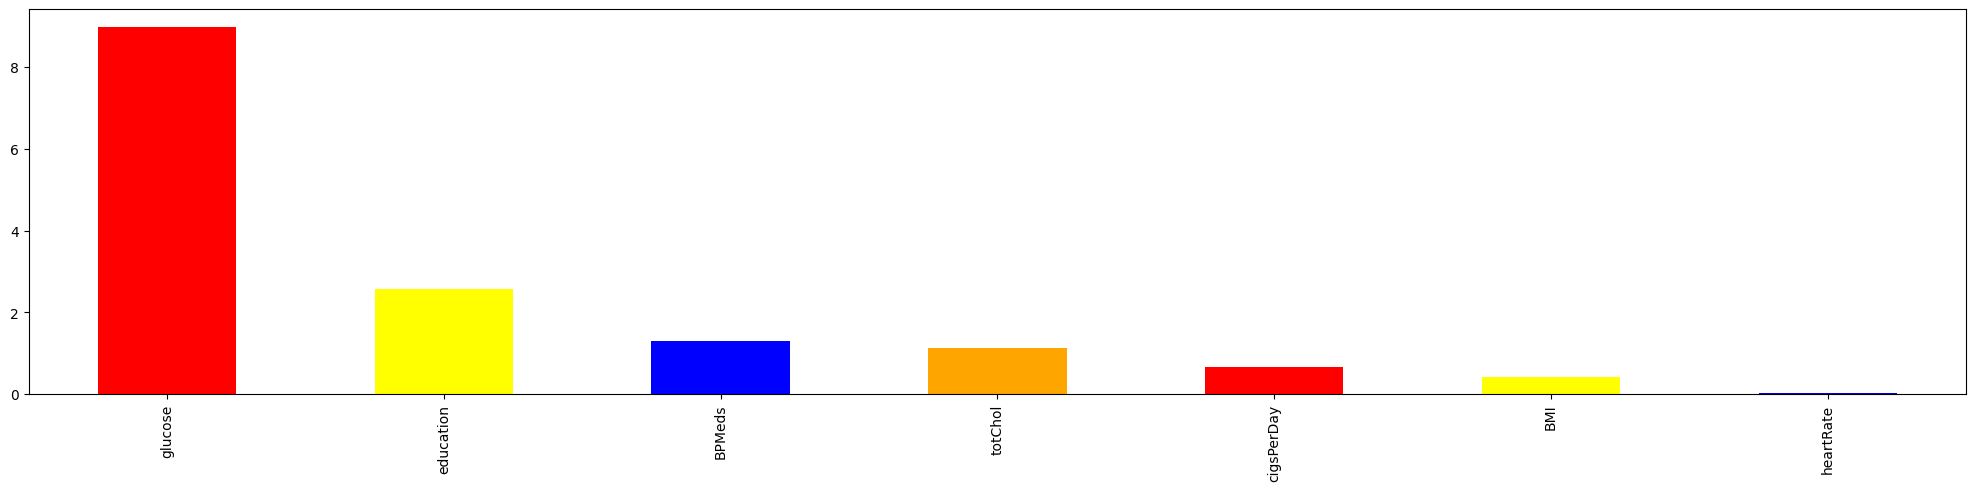

In [ ]:
round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2).plot(kind='bar', color=['red', 'yellow', 'blue', 'orange'])

In [ ]:
df.info

<bound method DataFrame.info of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0        

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/train.csv')

# Print all rows of the dataset
print(df)

        id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0

In [ ]:
print("number of rows of the dataset: ",df.shape[0],"\t","number of rows of the dataset:",df.shape[1])

number of rows of the dataset:  3390 	 number of rows of the dataset: 17


In [ ]:
# Check the number of people who are smoking
df_positive = df[df["is_smoking"] == "YES"]
df_positive.head(10)


id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0    0   64        2.0   F        YES         3.0     0.0                0   
2    2   46        1.0   F        YES        10.0     0.0                0   
3    3   50        1.0   M        YES        20.0     0.0                0   
4    4   64        1.0   F        YES        30.0     0.0                0   
7    7   36        4.0   M        YES        35.0     0.0                0   
8    8   41        2.0   F        YES        20.0     NaN                0   
13  13   44        1.0   M        YES        40.0     0.0                0   
15  15   51        1.0   M        YES        15.0     0.0                0   
19  19   42        1.0   M        YES        30.0     0.0                0   
20  20   42        1.0   F        YES        20.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0              0         0    221.0  148.0   85.0    NaN       90.0     80.0   
2              0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3              1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4              0         0    241.0  136.5   85.0  26.42       70.0     77.0   
7              0         0    295.0  102.0   68.0  28.15       60.0     63.0   
8              0         0    220.0  126.0   78.0  20.70       86.0     79.0   
13             0         0    227.0  146.5   97.0  26.92       80.0     67.0   
15             0         0    212.0  146.0   89.0  24.49      100.0    132.0   
19             0         0    232.0  130.0   91.0  25.77       72.0     70.0   
20             1         0    199.0  141.0   92.0  43.69       80.0     60.0   

    TenYearCHD  
0            1  
2            0  
3            1  
4            0  
7            0  
8            0  
13           0  
15           1  
19           0  
20           1

In [ ]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

Text(0.5, 1.0, 'BP Medication persons Proposanate')

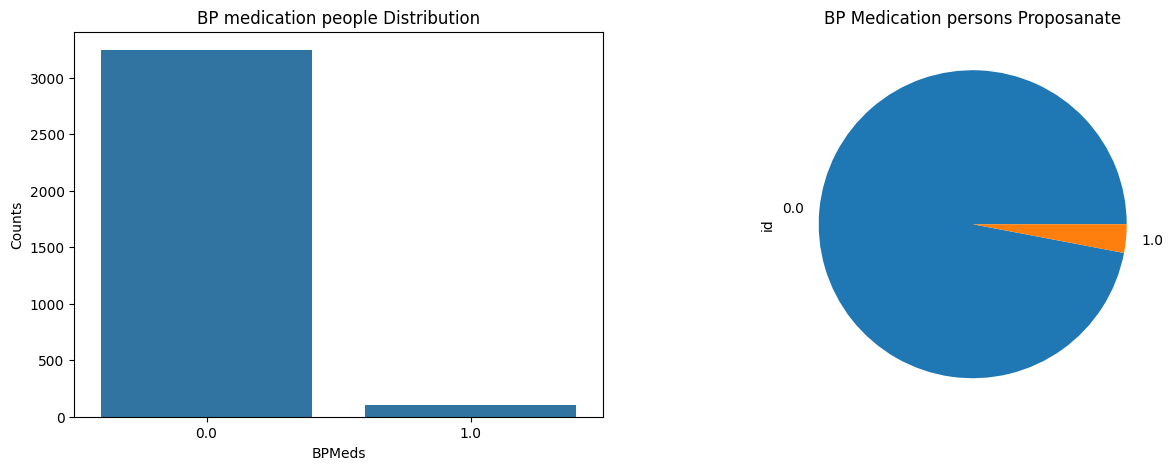

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['BPMeds'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('BPMeds')
plt.ylabel('Counts')
plt.title('BP medication people Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['BPMeds'])['id'].count().plot(kind='pie')
plt.title('BP Medication persons Proposanate')

Text(0.5, 1.0, 'BP Medication people distribution with Ten years CHD')

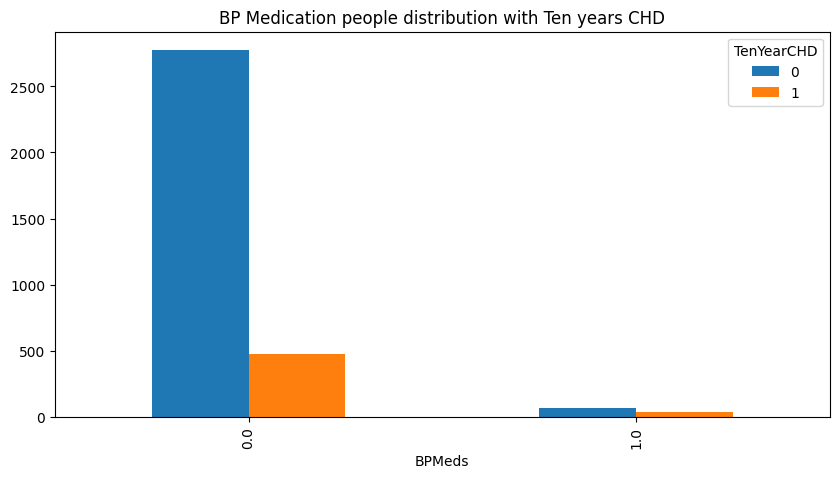

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['BPMeds','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('BP Medication people distribution with Ten years CHD')

In [ ]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [ ]:
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

Text(0.5, 1.0, 'cigrets per day Proposanate')

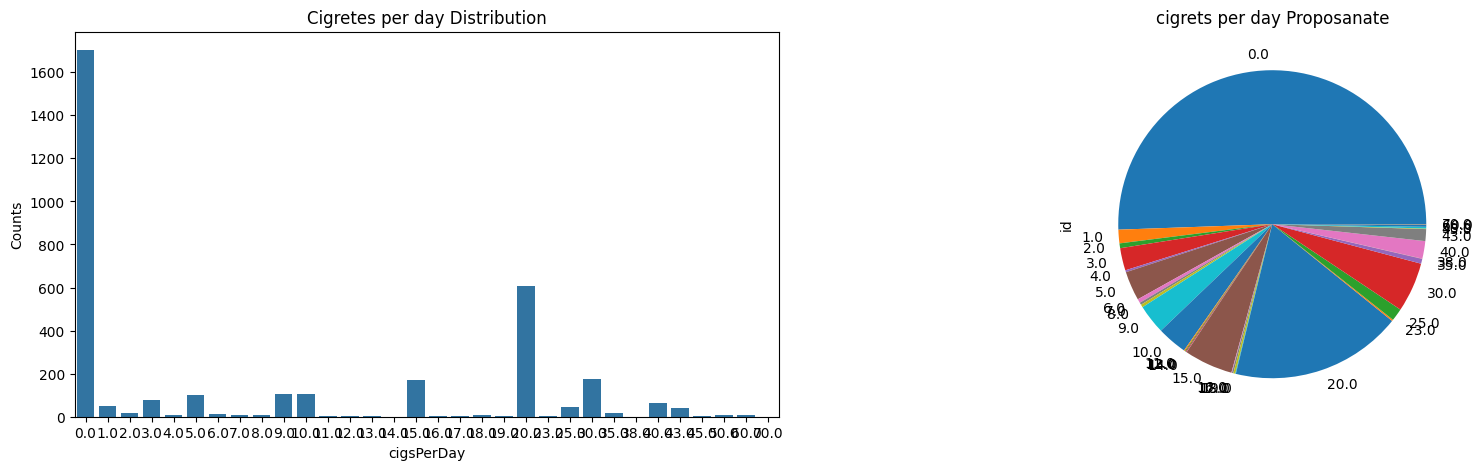

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['cigsPerDay'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('cigsPerDay')
plt.ylabel('Counts')
plt.title('Cigretes per day Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['cigsPerDay'])['id'].count().plot(kind='pie')
plt.title('cigrets per day Proposanate')

Text(0.5, 1.0, 'cig per day with Ten years CHD')

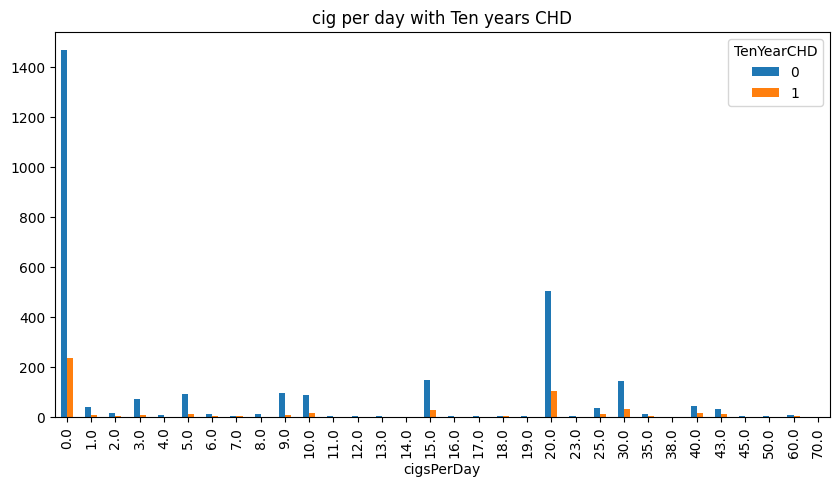

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['cigsPerDay','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('cig per day with Ten years CHD')

In [ ]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [ ]:
df.groupby(['prevalentStroke'])['id'].count()

prevalentStroke
0    3368
1      22
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

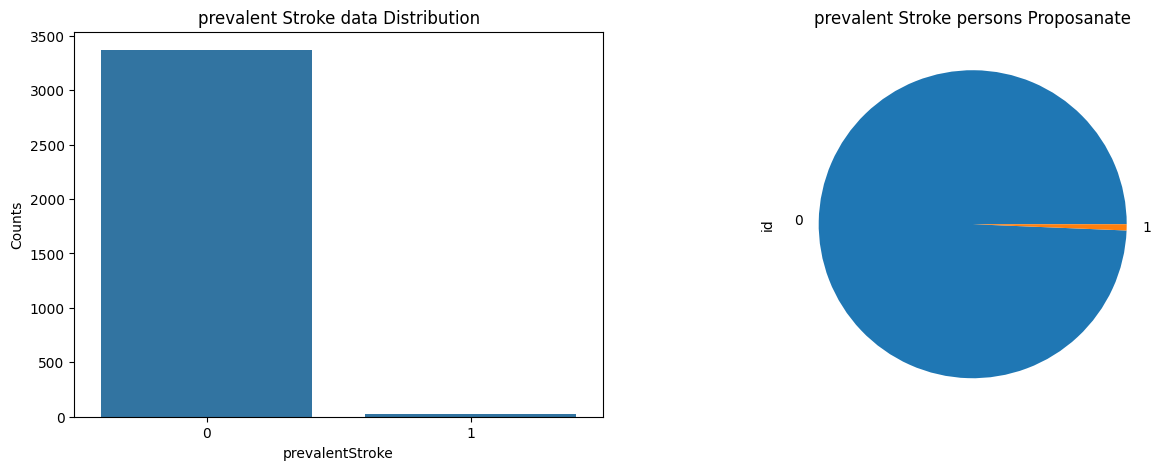

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['prevalentStroke'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['prevalentStroke'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

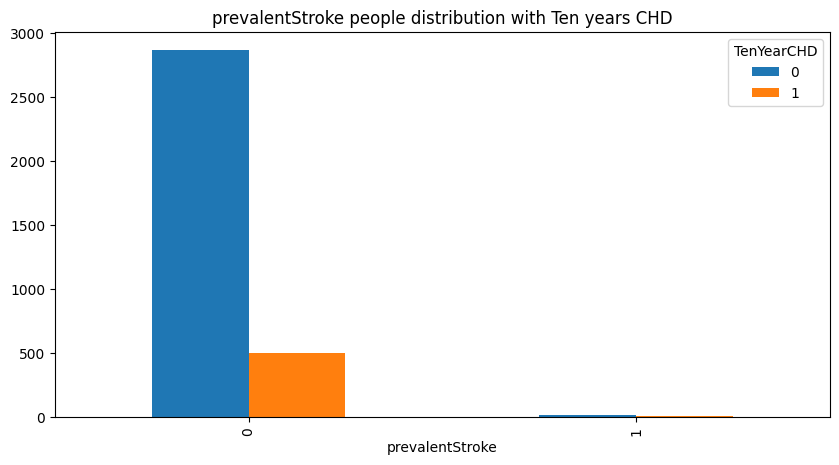

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['prevalentStroke','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

Text(0.5, 1.0, 'Age Distrubution')

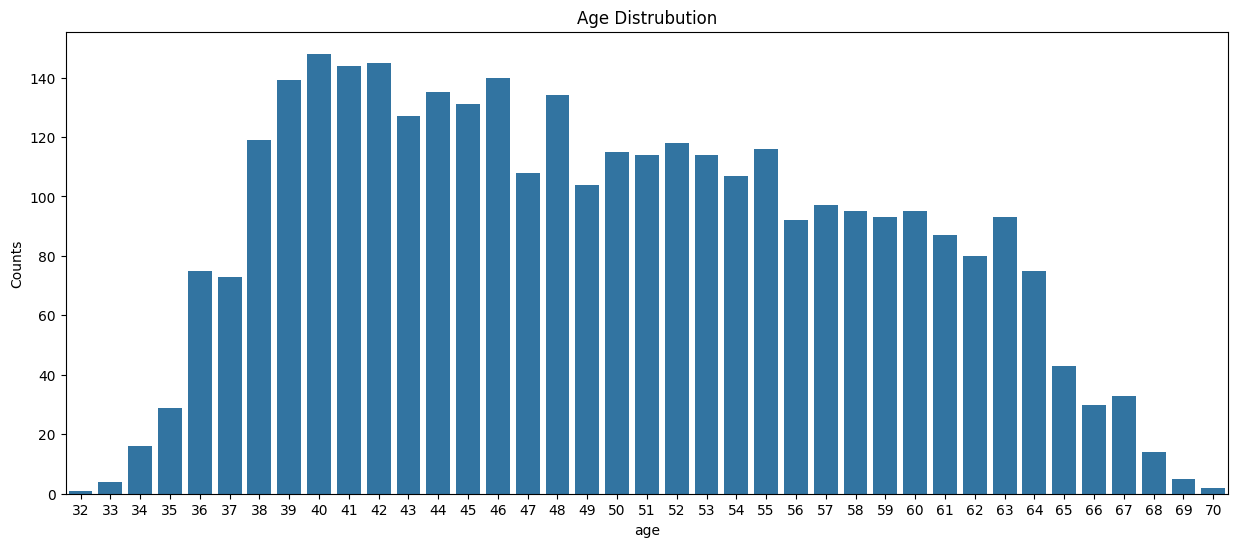

In [ ]:
#Data contains people of age from 32-70 years. People are effected to cardivasucular Desises from 35
fig, ax = plt.subplots(figsize=(15,6))
age_dis=pd.DataFrame(df.groupby(['age'])['id'].count())
sns.barplot(x=age_dis.index,y=age_dis['id'])
plt.ylabel('Counts')
plt.title('Age Distrubution')

Text(0.5, 1.0, 'Age wise Effected People')

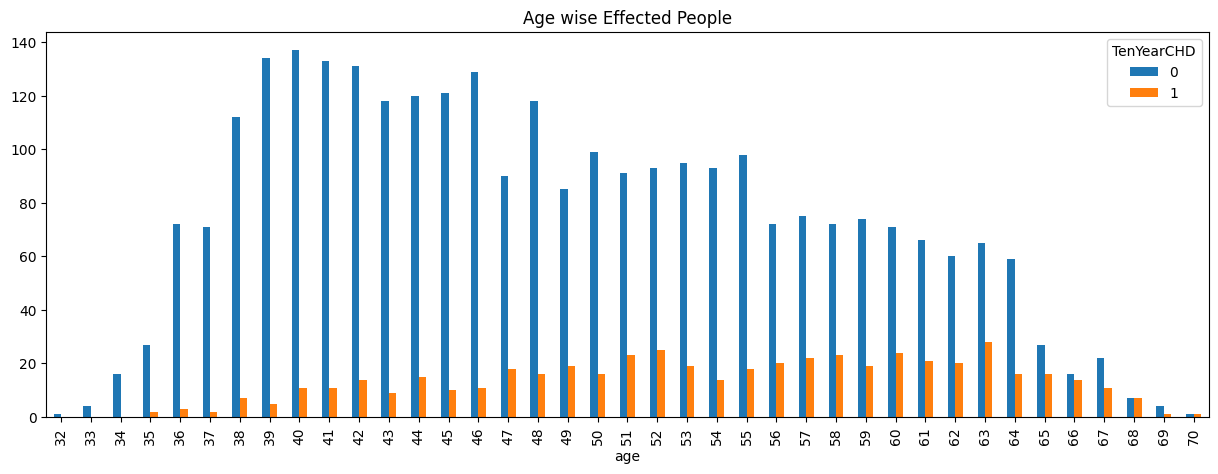

In [ ]:
#Age wise Effected People
plt.rcParams['figure.figsize'] = (15, 5)
df.groupby(['age','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Age wise Effected People')



<Axes: xlabel='age'>

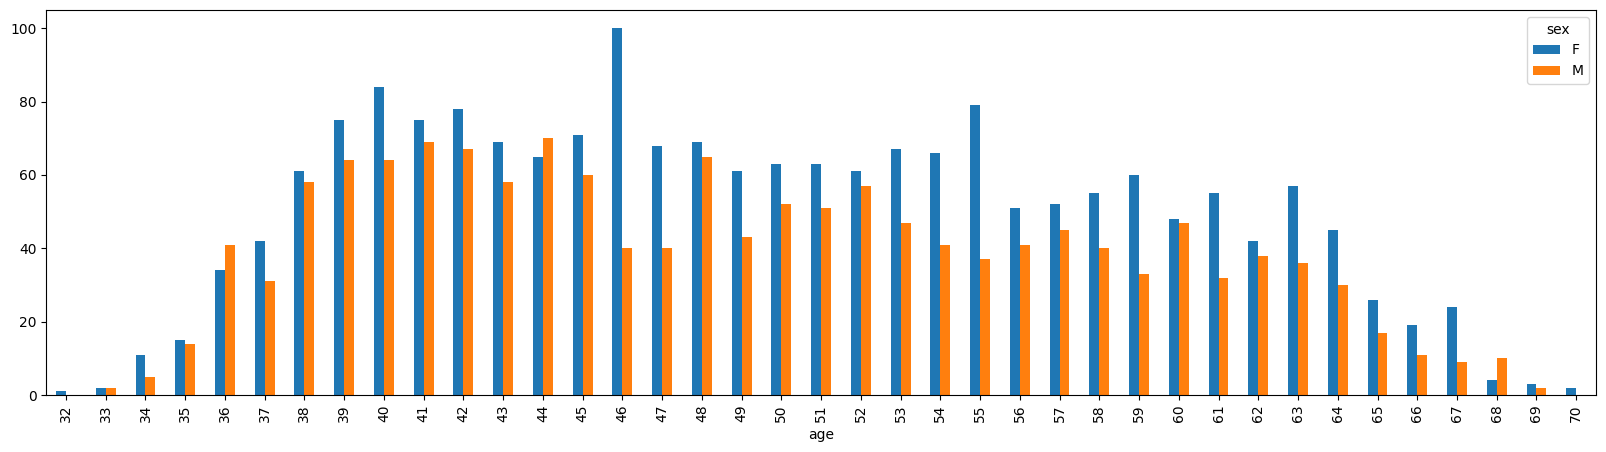

In [ ]:
#sex wise affected ppl
plt.rcParams['figure.figsize'] = (20, 5)
df.groupby(['age','sex'])['TenYearCHD'].count().unstack().plot(kind='bar')

In [ ]:
df.groupby(['education'])['id'].count()

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: id, dtype: int64

Text(0.5, 1.0, 'Education Proposanate')

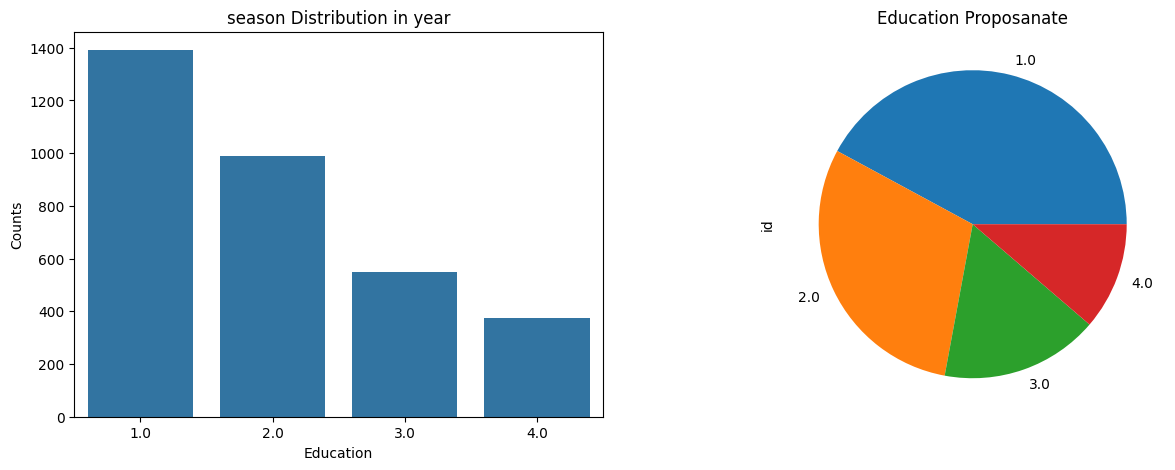

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['education'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('season Distribution in year')
ax2=plt.subplot(1,2,2)
df.groupby(['education'])['id'].count().plot(kind='pie')
plt.title('Education Proposanate')

Text(0.5, 1.0, 'Education with Ten years CHD')

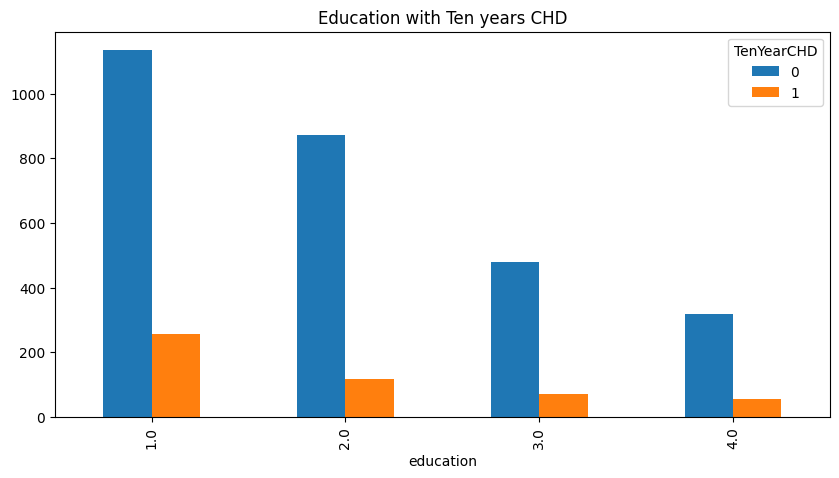

In [ ]:
#Education with Ten years CHD
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['education','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Education with Ten years CHD')

In [ ]:
df.groupby(['prevalentHyp'])['id'].count()


prevalentHyp
0    2321
1    1069
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

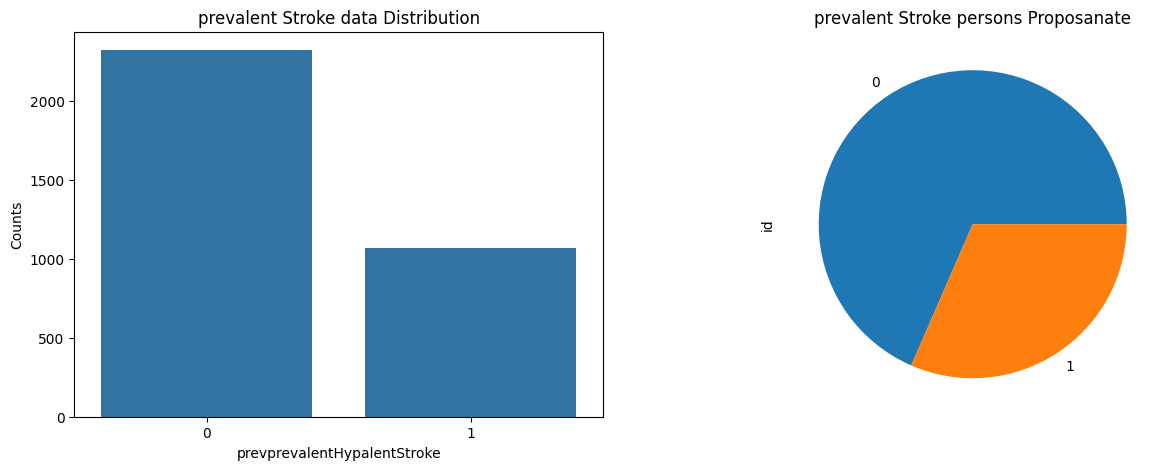

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['prevalentHyp'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevprevalentHypalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['prevalentHyp'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

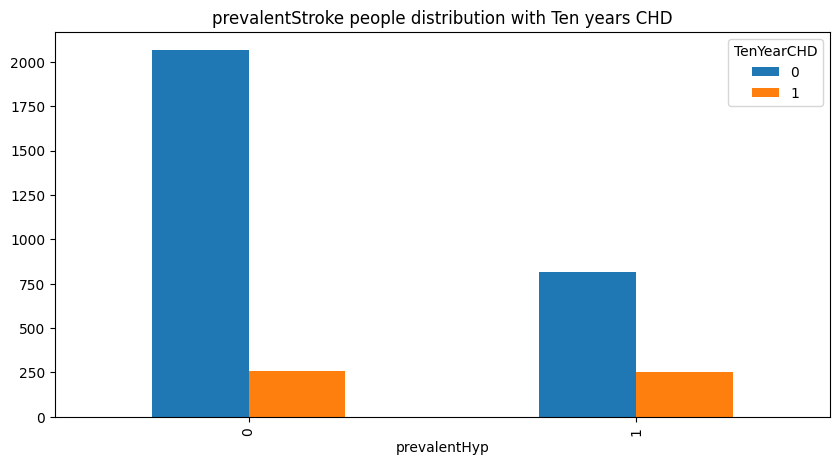

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['prevalentHyp','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

Text(0.5, 1.0, 'sex ratio Proposanate')

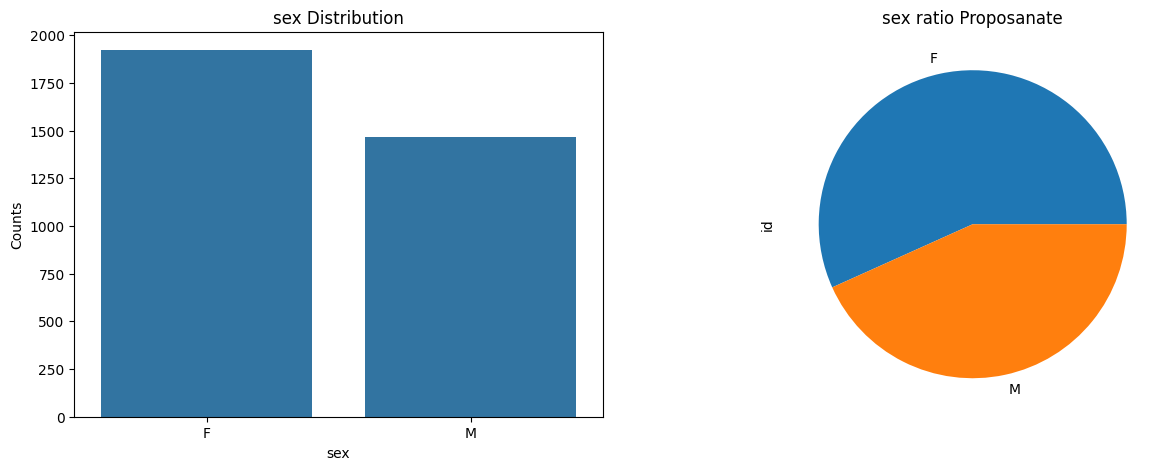

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['sex'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('sex')
plt.ylabel('Counts')
plt.title('sex Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['sex'])['id'].count().plot(kind='pie')
plt.title('sex ratio Proposanate')

Text(0.5, 1.0, 'Sex distribution with Ten years CHD')

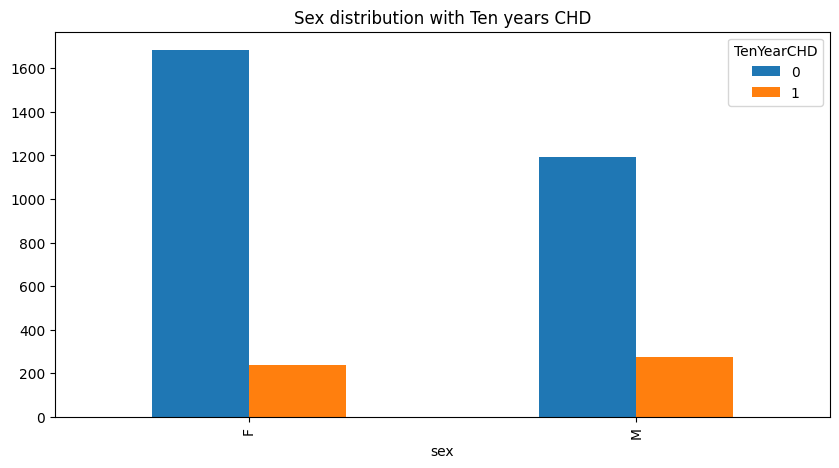

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['sex','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('Sex distribution with Ten years CHD')

In [ ]:
df.groupby(['diabetes'])['id'].count()

diabetes
0    3303
1      87
Name: id, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

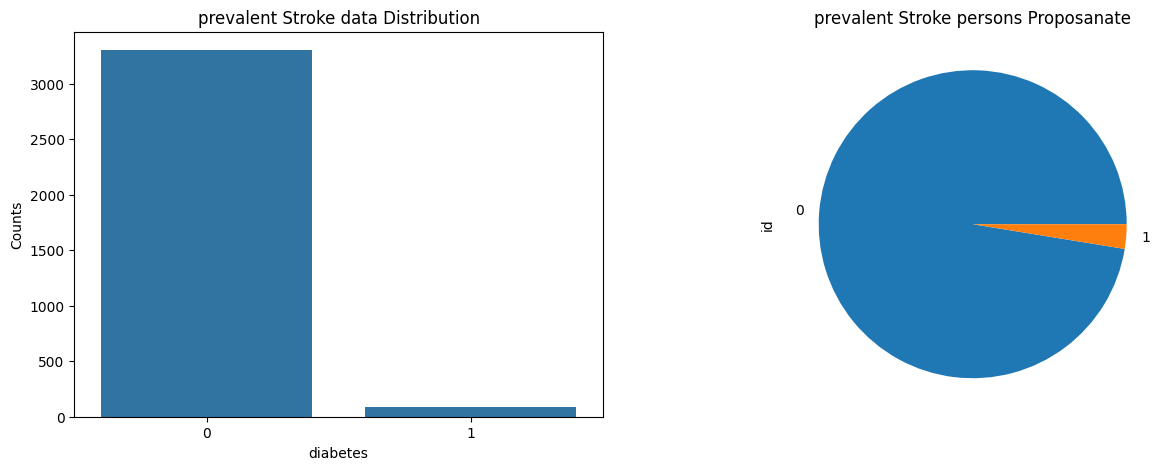

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['diabetes'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('diabetes')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['diabetes'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

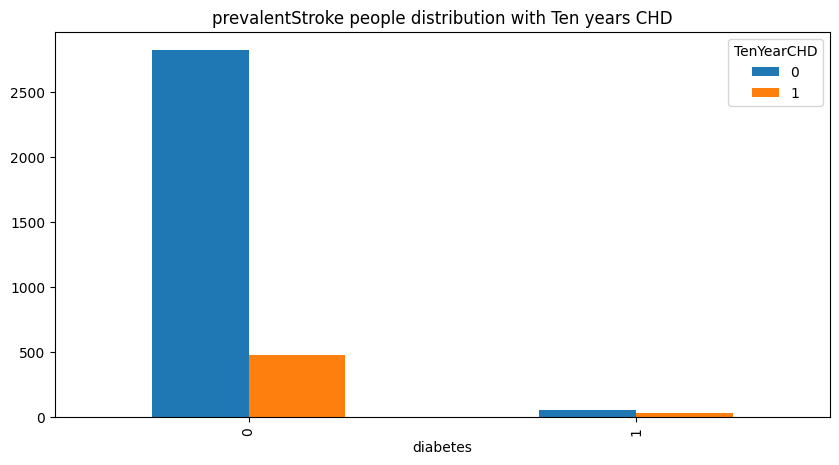

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['diabetes','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['totChol'])['id'].count()

totChol
107.0    1
113.0    1
119.0    1
124.0    1
126.0    1
        ..
439.0    1
453.0    1
464.0    1
600.0    1
696.0    1
Name: id, Length: 240, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

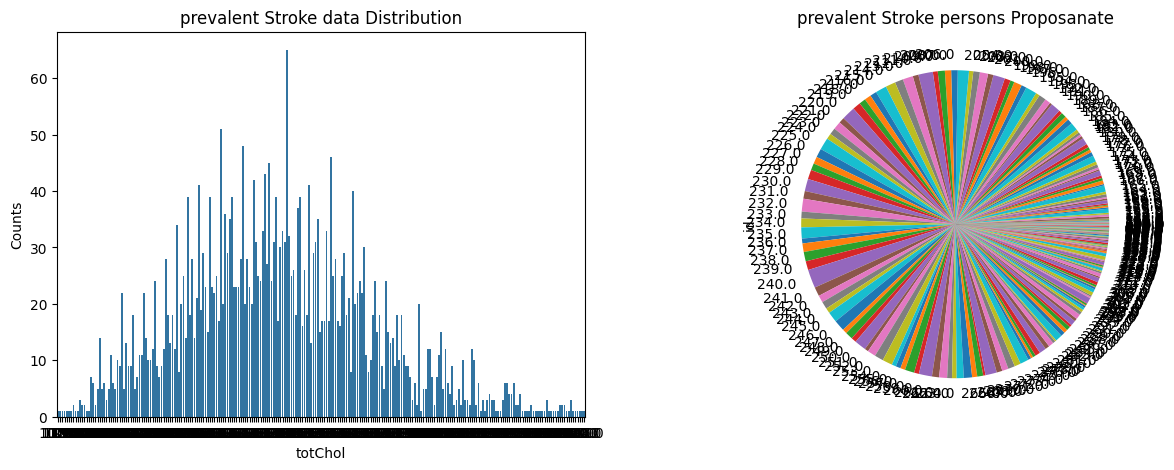

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['totChol'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('totChol')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['totChol'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

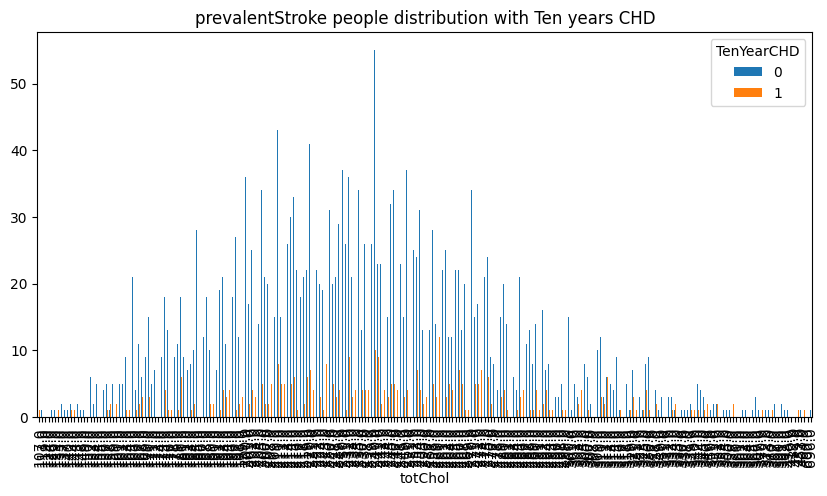

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['totChol','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['sysBP'])['id'].count()

sysBP
83.5     2
85.0     1
85.5     1
90.0     2
92.5     1
        ..
235.0    1
243.0    1
244.0    1
248.0    1
295.0    1
Name: id, Length: 226, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

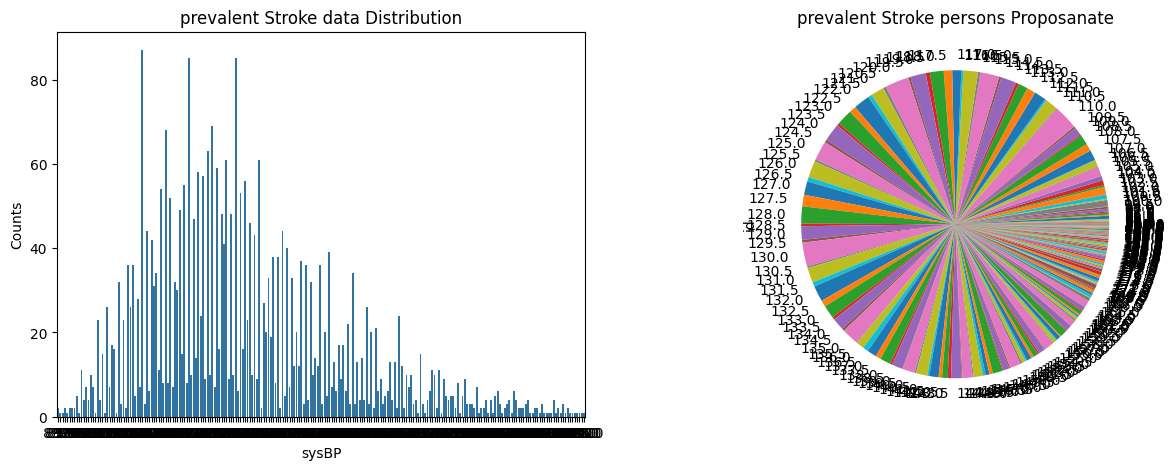

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['sysBP'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('sysBP')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['sysBP'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

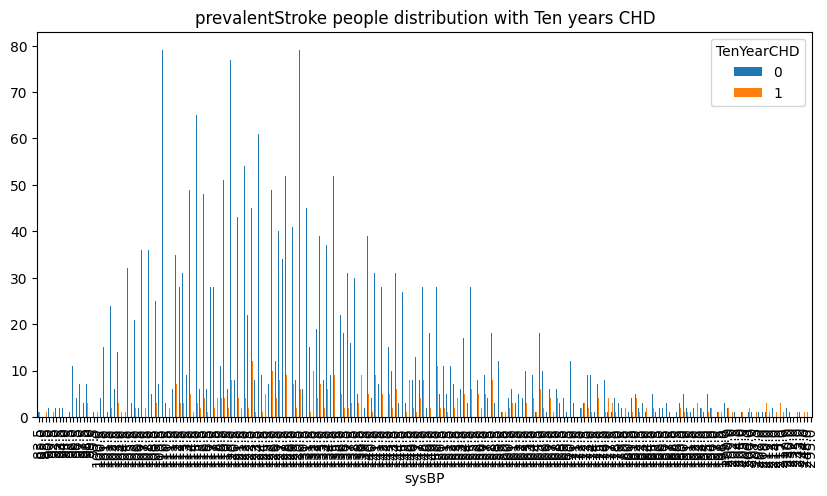

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['sysBP','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['diaBP'])['id'].count()

diaBP
48.0     1
50.0     1
51.0     1
52.0     2
53.0     1
        ..
130.0    5
133.0    2
135.0    2
136.0    2
142.5    1
Name: id, Length: 142, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

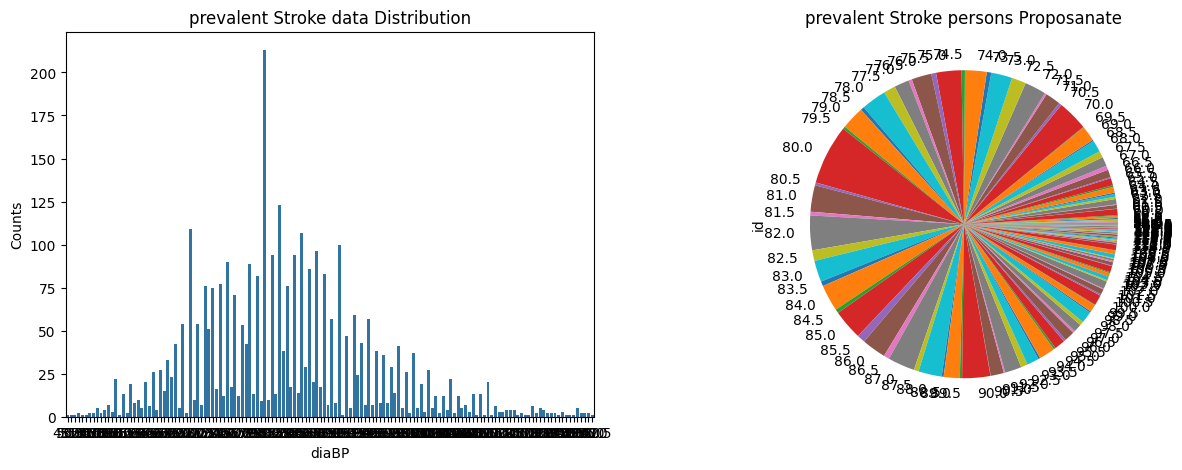

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['diaBP'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('diaBP')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['diaBP'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

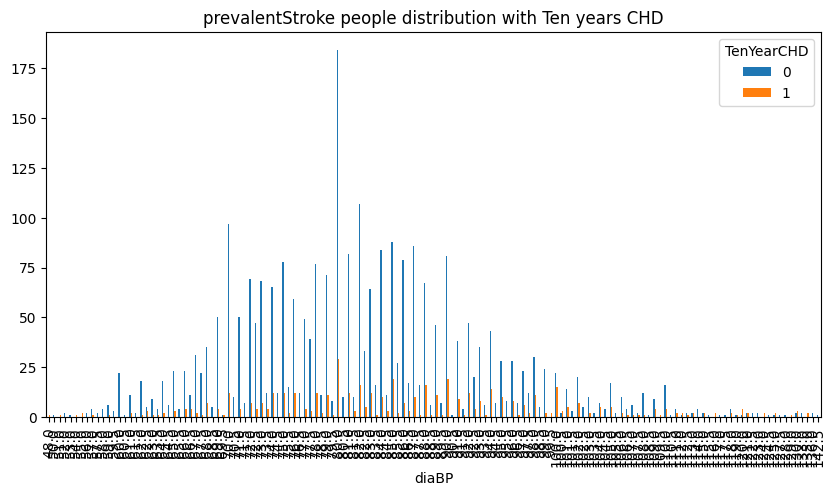

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['diaBP','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['BMI'])['id'].count()

BMI
15.96    1
16.48    1
16.59    1
16.61    1
16.69    1
        ..
44.71    1
45.79    1
45.80    1
51.28    1
56.80    1
Name: id, Length: 1259, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

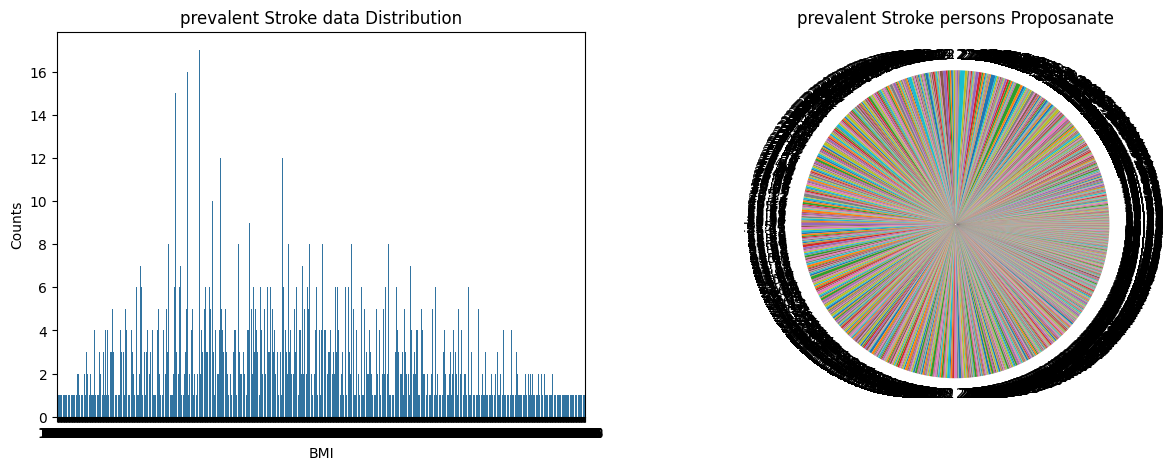

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['BMI'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['BMI'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

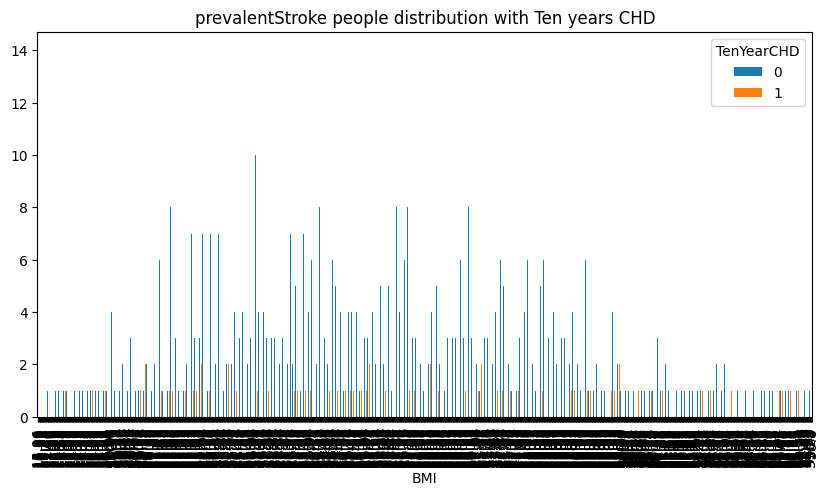

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['BMI','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['heartRate'])['id'].count()

heartRate
45.0      1
47.0      1
48.0      4
50.0     15
51.0      1
         ..
120.0     5
122.0     2
125.0     3
140.0     1
143.0     1
Name: id, Length: 68, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

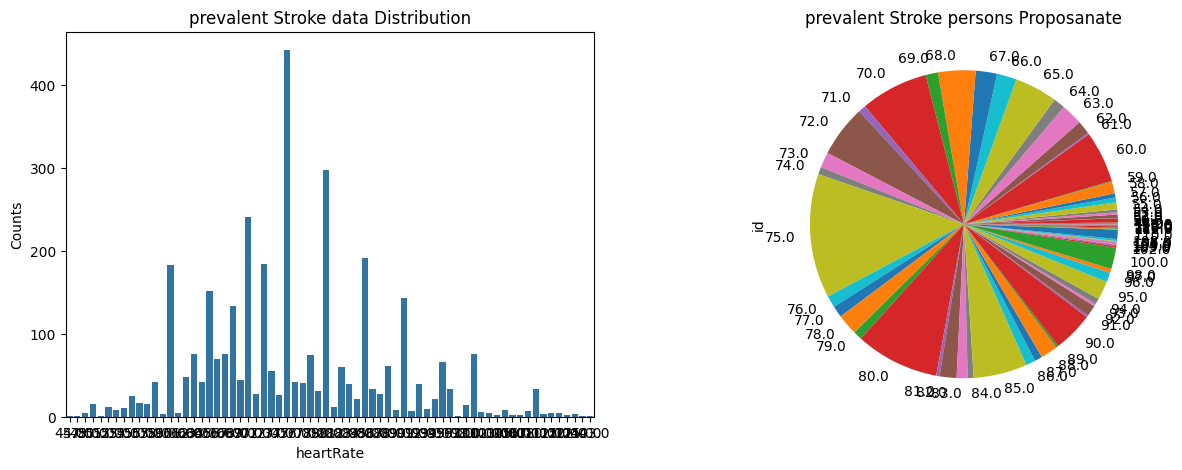

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['heartRate'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('heartRate')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['heartRate'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

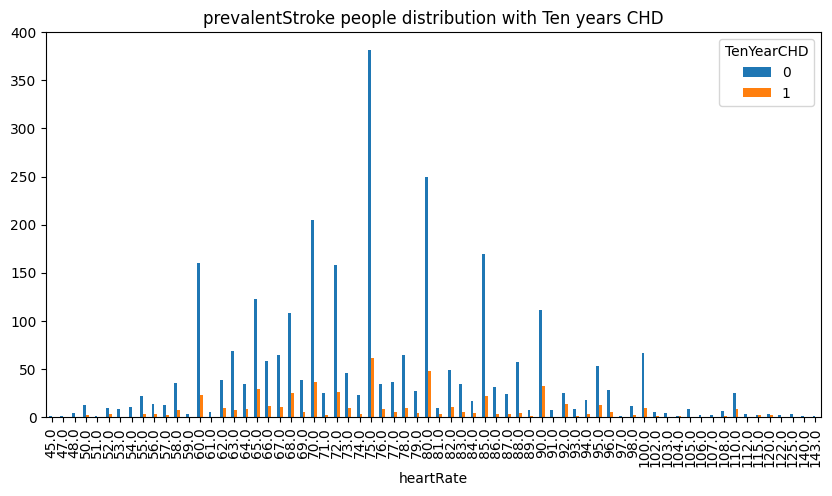

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['heartRate','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

In [ ]:
df.groupby(['glucose'])['id'].count()

glucose
40.0     1
43.0     1
44.0     2
45.0     3
47.0     2
        ..
332.0    1
348.0    1
368.0    1
386.0    1
394.0    2
Name: id, Length: 132, dtype: int64

Text(0.5, 1.0, 'prevalent Stroke persons Proposanate')

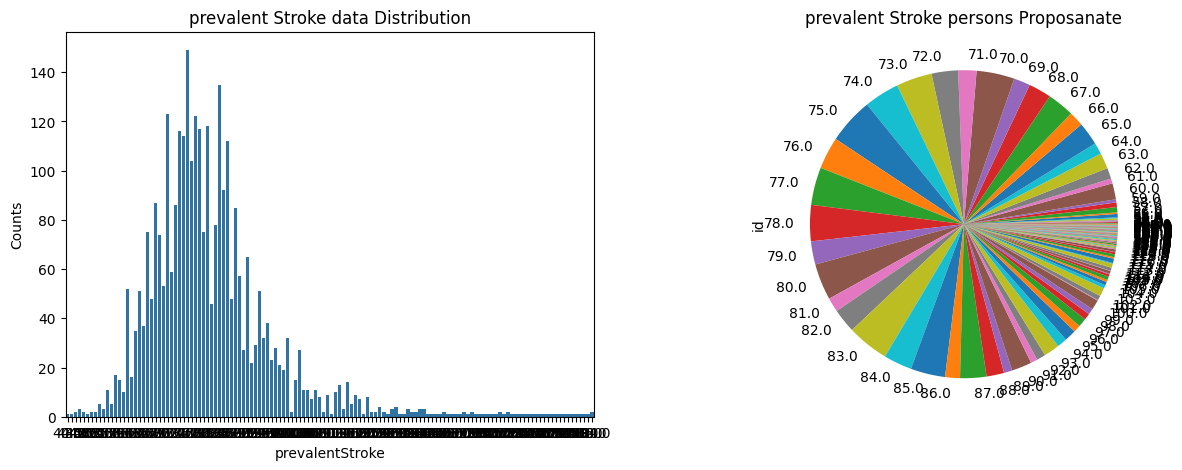

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax1=plt.subplot(1,2,1)
Education_status=pd.DataFrame(df.groupby(['glucose'])['id'].count())
sns.barplot(x=Education_status.index,y=Education_status['id'])
plt.xlabel('prevalentStroke')
plt.ylabel('Counts')
plt.title('prevalent Stroke data Distribution')
ax2=plt.subplot(1,2,2)
df.groupby(['glucose'])['id'].count().plot(kind='pie')
plt.title('prevalent Stroke persons Proposanate')

Text(0.5, 1.0, 'prevalentStroke people distribution with Ten years CHD')

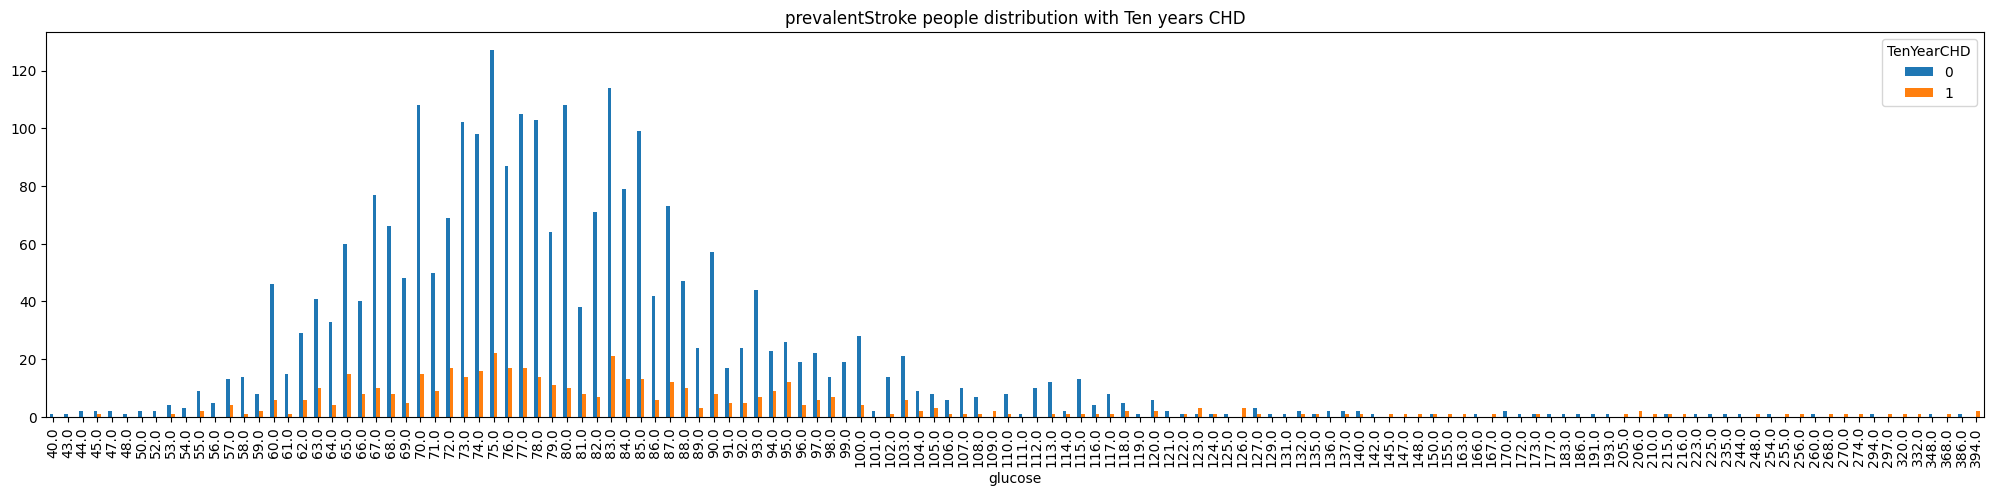

In [ ]:
plt.rcParams['figure.figsize'] = (25, 5)
df.groupby(['glucose','TenYearCHD'])['id'].count().unstack().plot(kind='bar')
plt.title('prevalentStroke people distribution with Ten years CHD')

<ipython-input-318-84e75ea12370>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor='black')


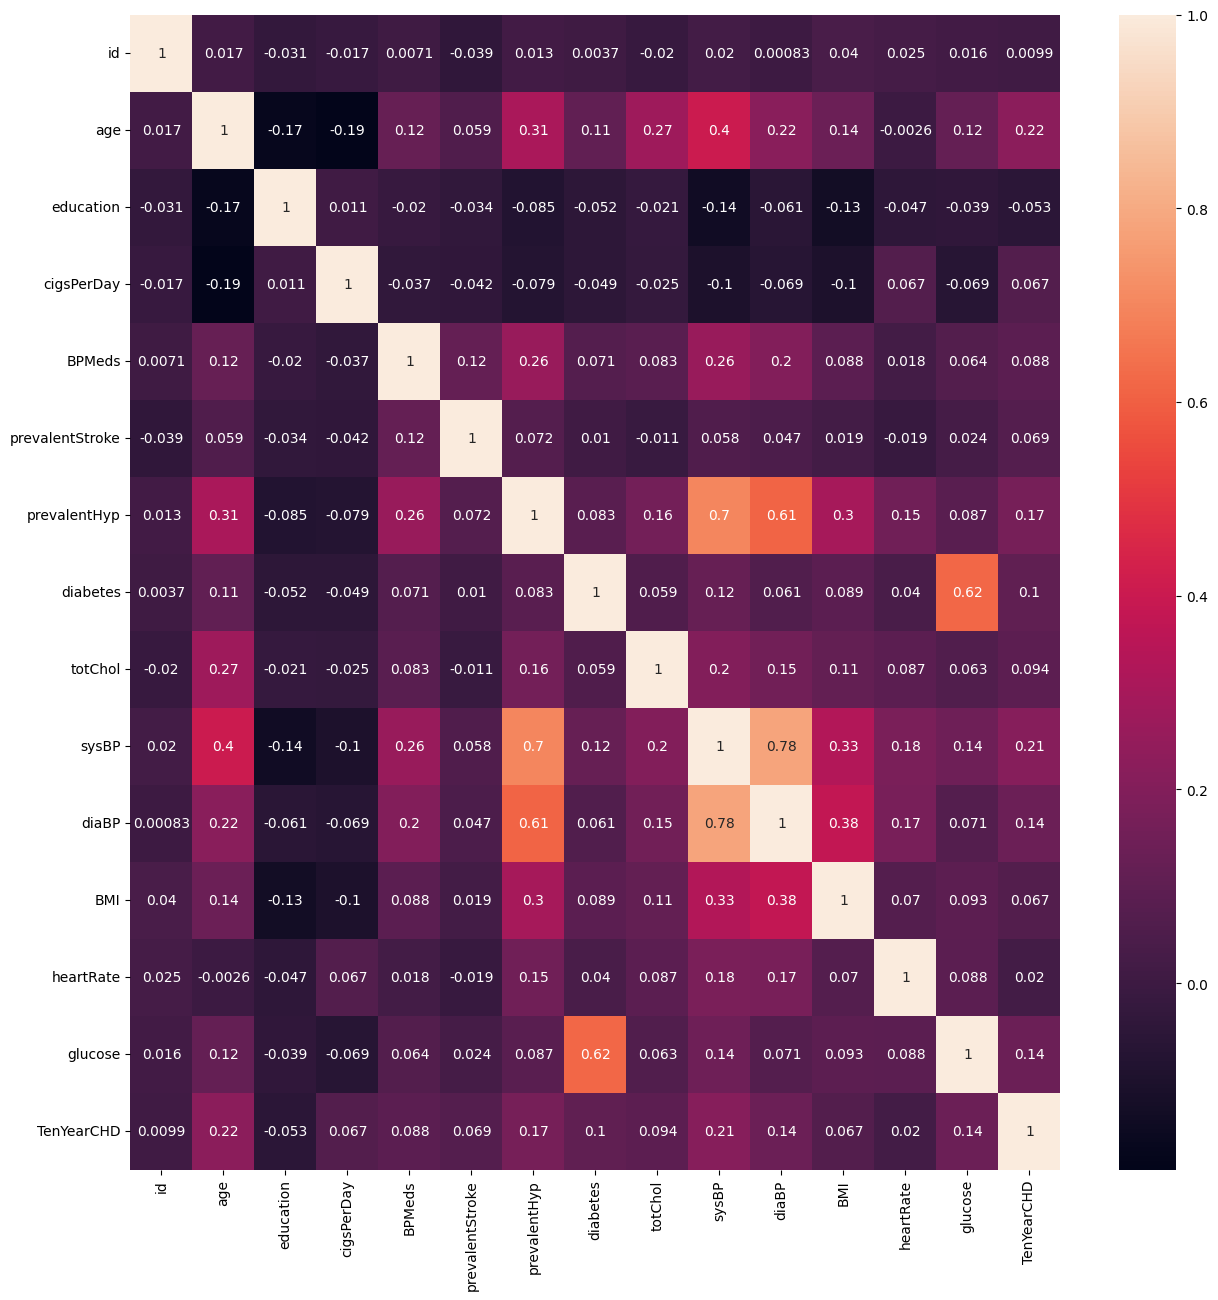

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linecolor='black')
plt.show()

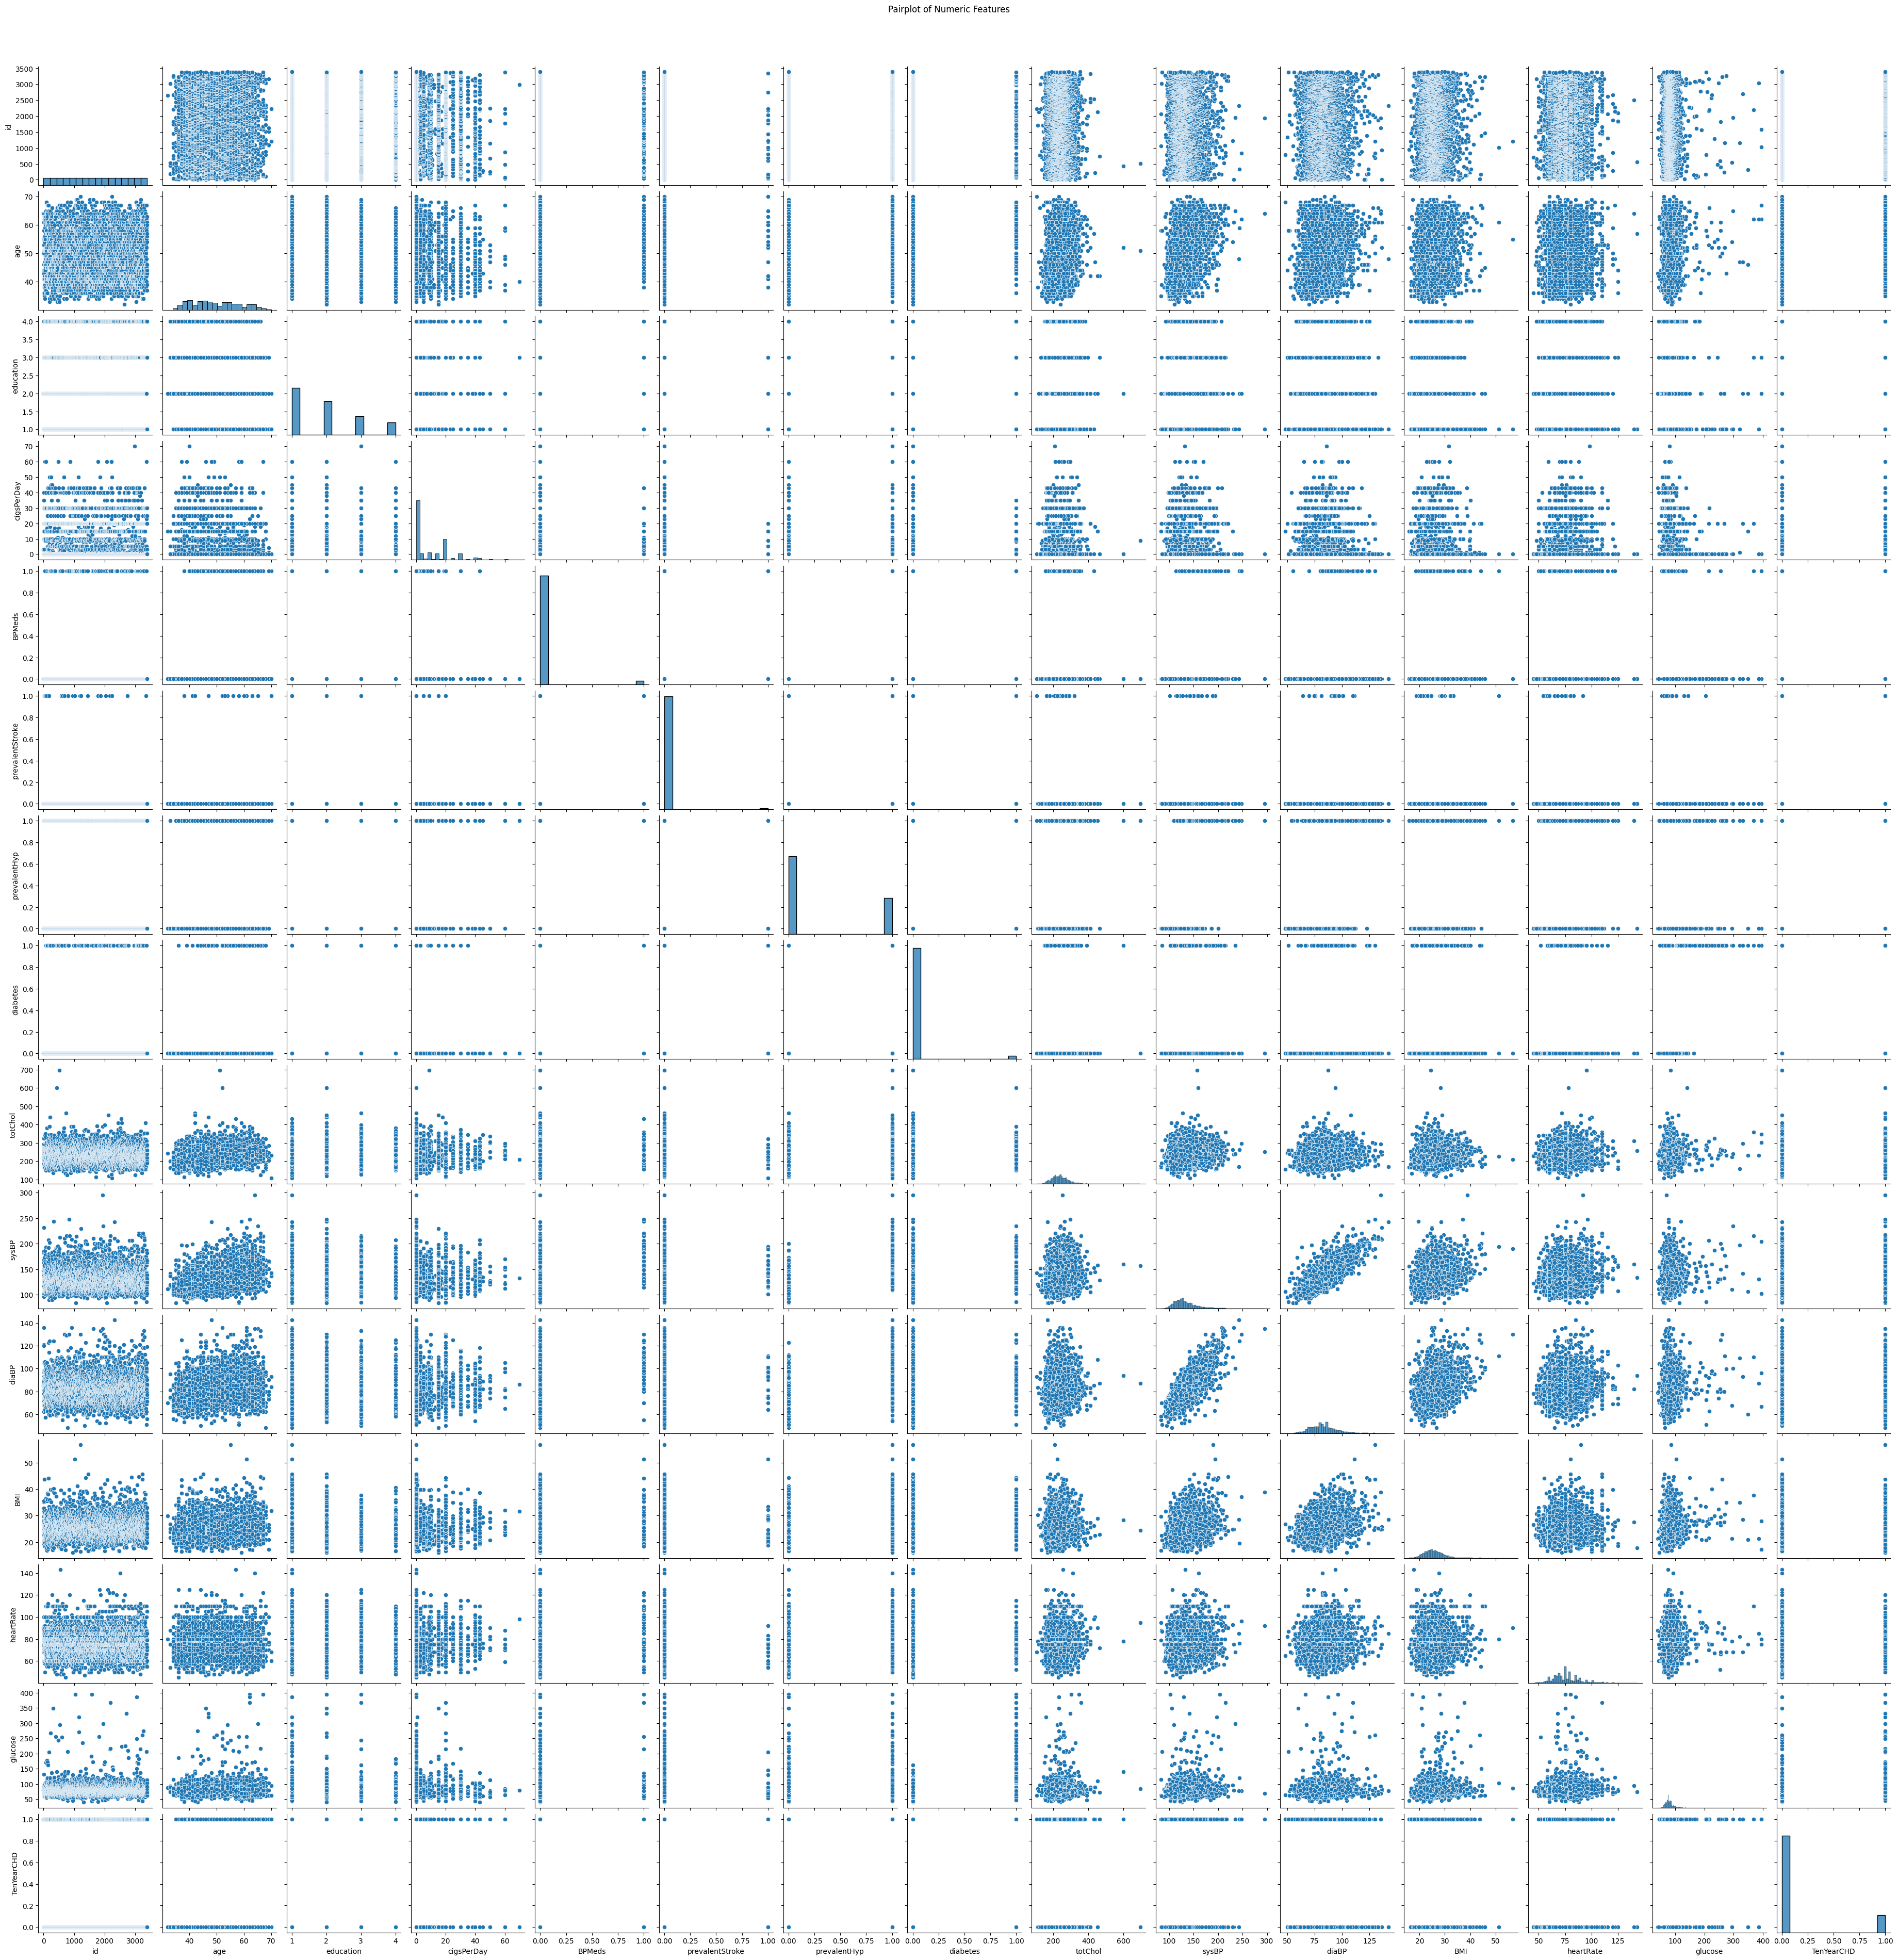

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

Reference

https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea
